In [2]:
from GSMMutils.experimental.ExpMatrix import ExpMatrix
from GSMMutils.experimental.Biomass import Biomass
from GSMMutils.stats.stats import StatisticalAnalysis
from GSMMutils import DATA_PATH
import pandas as pd
from GSMMutils.graphics.plot import boxplot, hist, qqplot

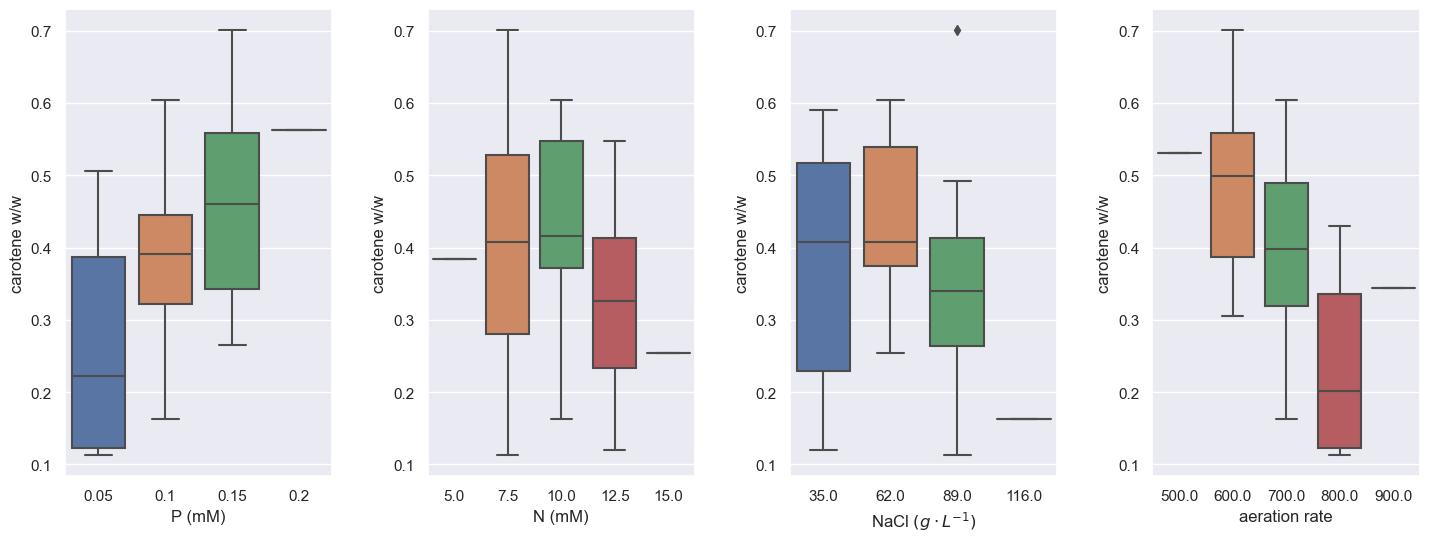

In [50]:
biomass = Biomass("e_Biomass__cytop", f"{DATA_PATH}/experimental/Biomass_exp_composition.xlsx")
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba.xlsx")
matrix.conditions = "Resume"
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()

m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)

boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['carotene'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'carotene': 'carotene w/w'})

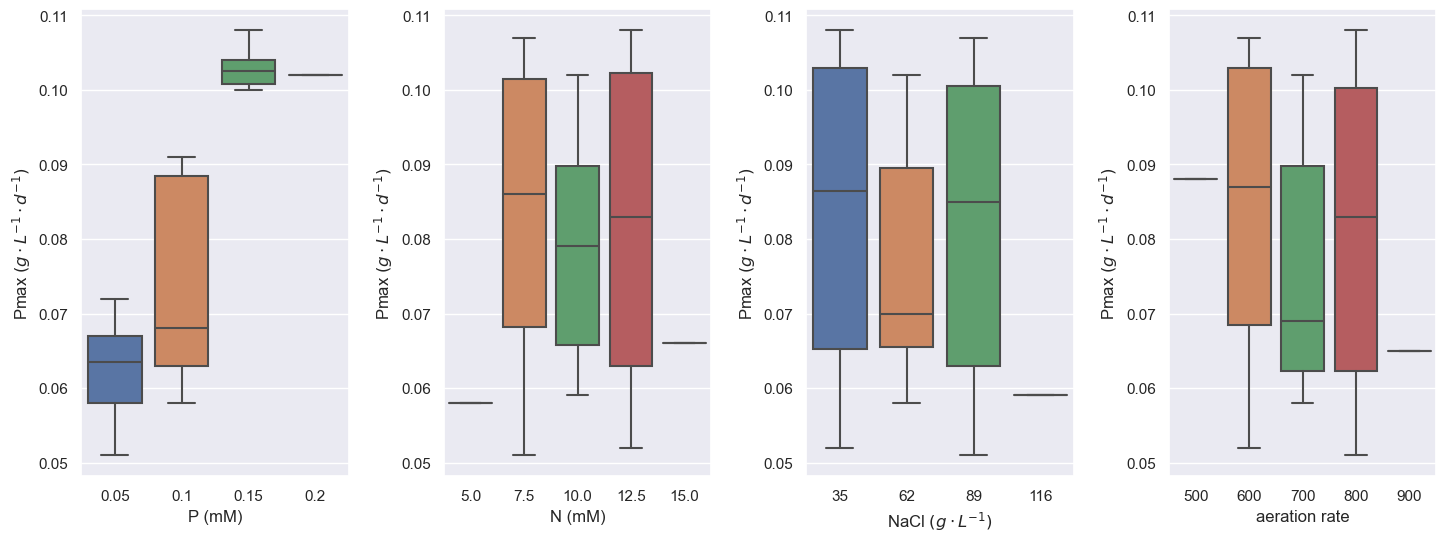

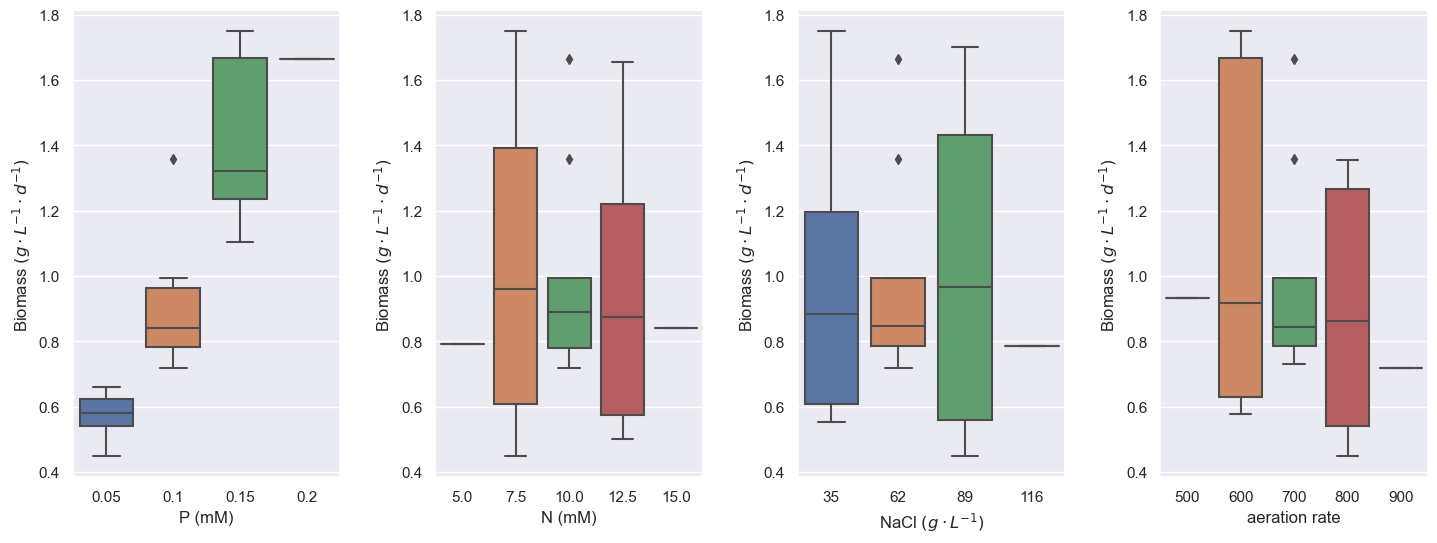

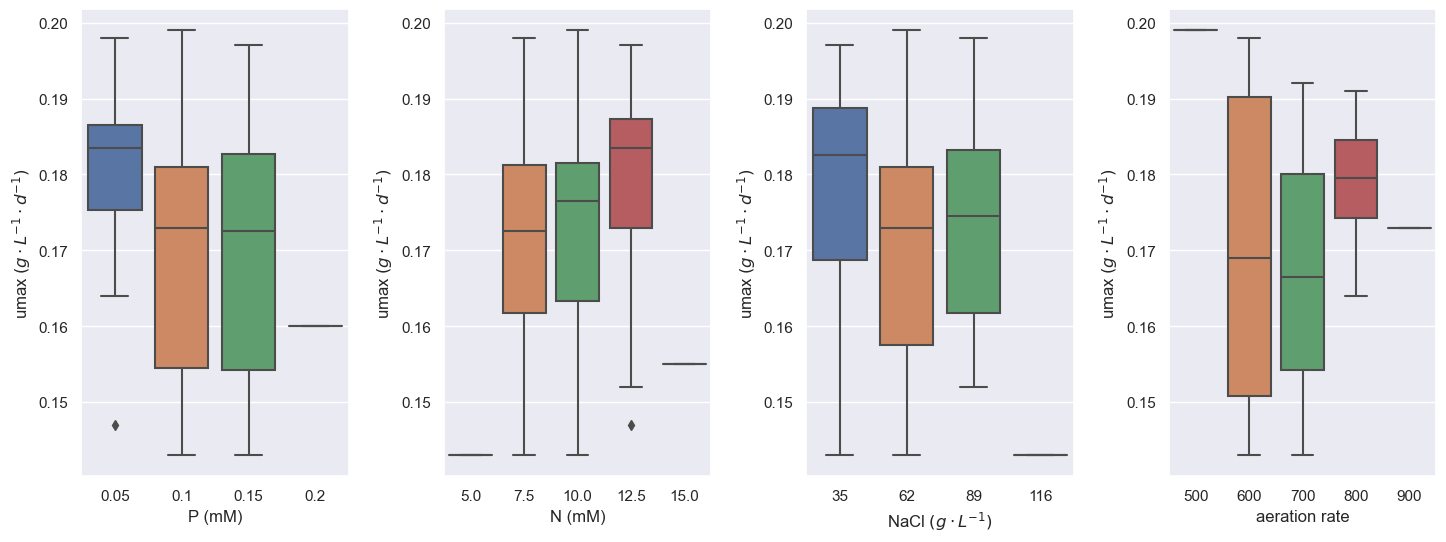

                  biomass ~ P                  
             sum_sq    df          F        PR(>F)
P         3.285165   1.0  94.940683  3.629901e-10
Residual  0.899659  26.0        NaN           NaN 
 ##################################################
            sum_sq    df          F        PR(>F)
P         3.285165   1.0  94.940683  3.629901e-10
Residual  0.899659  26.0        NaN           NaN


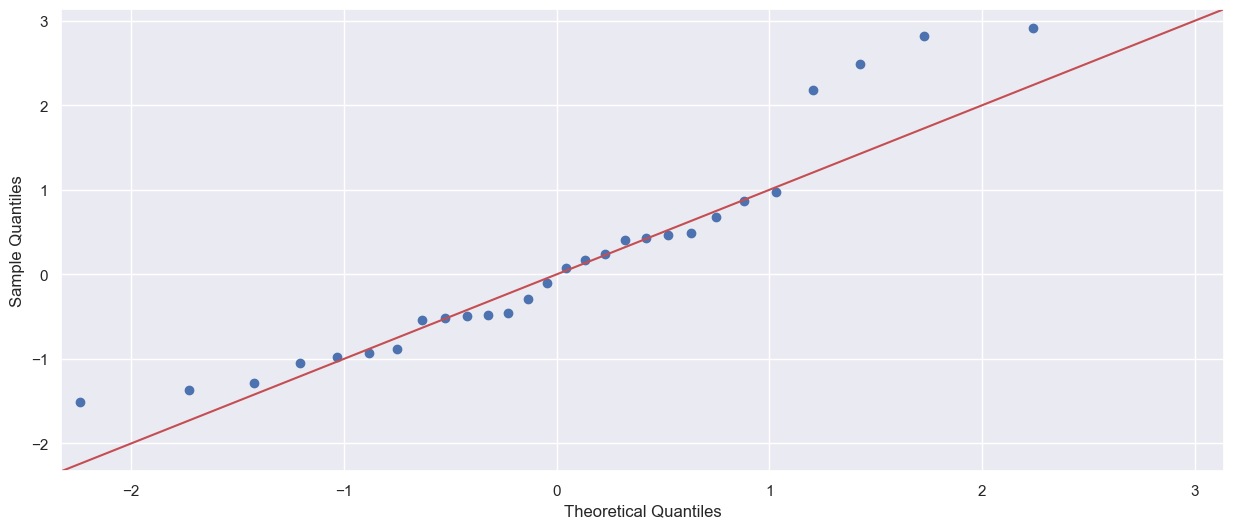

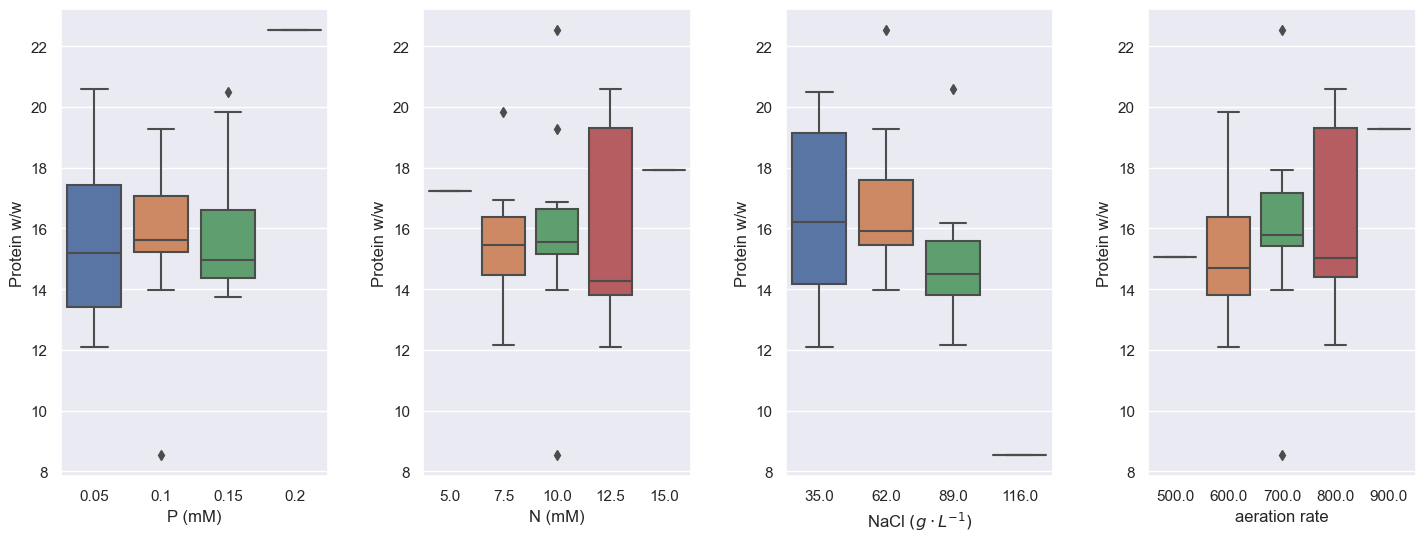

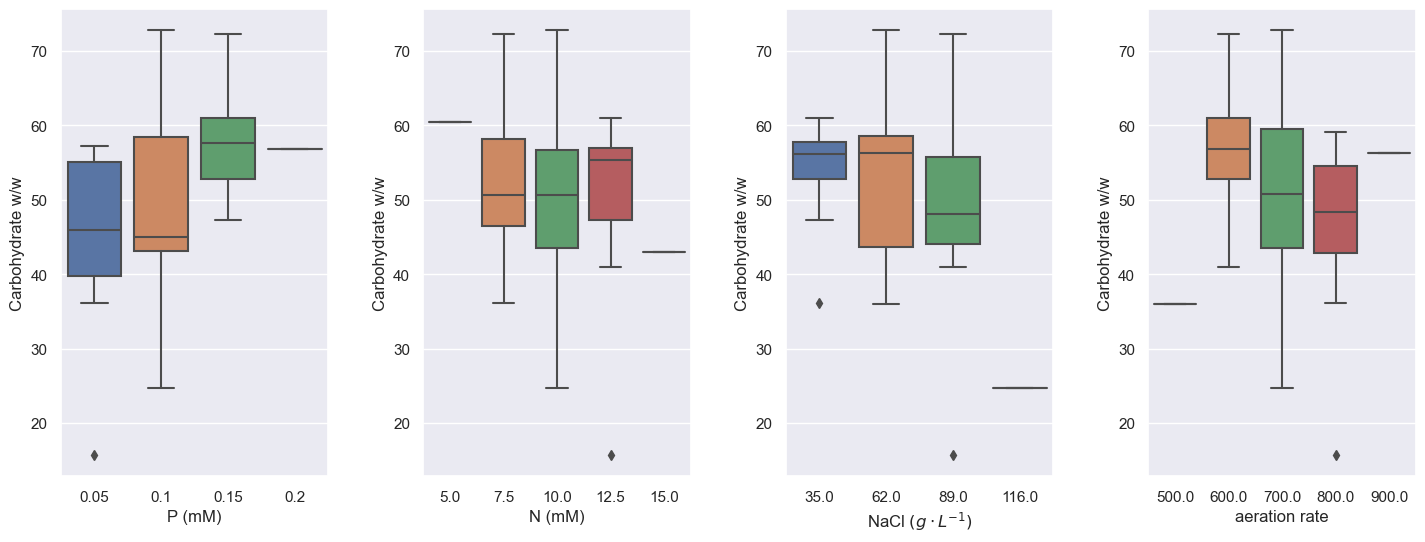

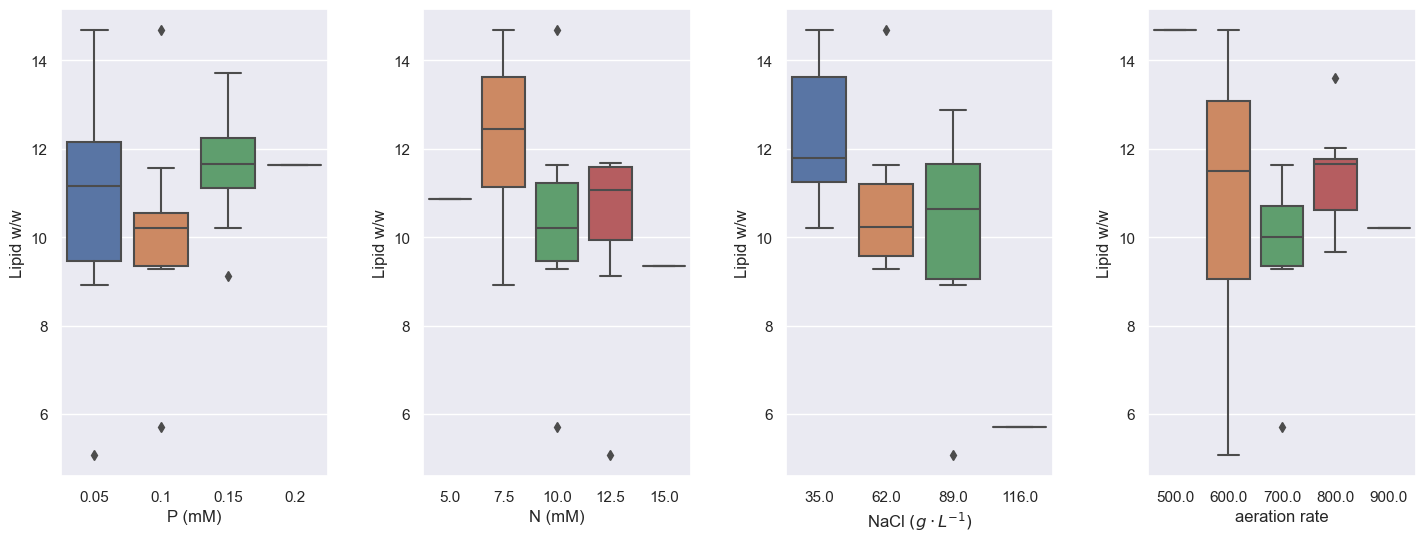

In [40]:
def stats(matrix):
    matrix.conditions = "Resume"
    matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
    boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Pmax'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
                            , y_labels={'Pmax': 'Pmax $(g \cdot L^{-1} \cdot d^{-1})$'})
    boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['biomass'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
            , y_labels={'biomass': 'Biomass $(g \cdot L^{-1} \cdot d^{-1})$'})
    boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['umax'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
            , y_labels={'umax': 'umax $(g \cdot L^{-1} \cdot d^{-1})$'})
    stats = StatisticalAnalysis(matrix.conditions)
    anova_table, model = stats.anova('biomass ~ P')
    print(anova_table)
    # hist(matrix.conditions, ['biomass'], title='Biomass', xlabel='Biomass $(g \cdot L^{-1})$', ylabel='Frequency')
    # hist(matrix.conditions, ['Pmax'], title='Maximum Productivity', xlabel='Pmax $(g \cdot L^{-1} \cdot h^{-1})$', ylabel='Frequency')
    # hist(matrix.conditions, ['umax'], title='Growth Rate', xlabel='Biomass $(h^{-1})$', ylabel='Frequency')
    qqplot(model, to_show=True)
biomass = Biomass("e_Biomass__cytop", f"{DATA_PATH}/experimental/Biomass_exp_composition.xlsx")
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_new.xlsx")
matrix.conditions = "Resume"
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
stats(matrix)
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Protein'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
    , y_labels={'Protein': 'Protein w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Carbohydrate'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
    , y_labels={'Carbohydrate': 'Carbohydrate w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Lipid'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
    , y_labels={'Lipid': 'Lipid w/w'})

In [22]:
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
stats = StatisticalAnalysis(m)

In [13]:
stats.get_correlation()

,Protein,Carbohydrate,Lipid,N,P,salinity,aeration
Protein,1.00,0.14,0.33,0.06,0.24,-0.38,0.23
Carbohydrate,0.14,1.00,0.02,-0.19,0.40,-0.32,-0.14
Lipid,0.33,0.02,1.00,-0.33,0.17,-0.54,-0.09
N,0.06,-0.19,-0.33,1.00,0.00,-0.00,-0.00
P,0.24,0.40,0.17,0.00,1.00,-0.01,0.00
salinity,-0.38,-0.32,-0.54,-0.00,-0.01,1.00,0.00
aeration,0.23,-0.14,-0.09,-0.00,0.00,0.00,1.00


In [ ]:
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['chla'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'chla': 'chlorophyll a w/w'})

In [23]:
stats = StatisticalAnalysis(m)
cor = stats.get_correlation()
print(cor)

              Protein  Carbohydrate  Lipid     N     P  salinity  aeration
Protein          1.00          0.14   0.33  0.06  0.24     -0.38      0.23
Carbohydrate     0.14          1.00   0.02 -0.19  0.40     -0.32     -0.14
Lipid            0.33          0.02   1.00 -0.33  0.17     -0.54     -0.09
N                0.06         -0.19  -0.33  1.00  0.72      0.04     -0.14
P                0.24          0.40   0.17  0.72  1.00      0.20     -0.40
salinity        -0.38         -0.32  -0.54  0.04  0.20      1.00     -0.38
aeration         0.23         -0.14  -0.09 -0.14 -0.40     -0.38      1.00


In [34]:
from matplotlib import pyplot as plt
import scipy

temp_results = m.copy()
temp_results['chlorophyll'] = temp_results['chla'] + temp_results['chlb']

temp_results['chlorophyll'] = temp_results['chlorophyll']/1000

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results['P'], temp_results['chlorophyll'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.3f}P + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results['P'], temp_results['chlorophyll'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['P'], slope * m['P'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

KeyError: 'chla'

In [66]:
len(m.index)

25

In [67]:
new_m = pd.concat([biomass.biomass_matrix['macromolecules'], m], axis=1).dropna()
new_m

,Protein,Carbohydrate,Lipid,lutein,chlb,chla,carotene,N,P,salinity,aeration
1,16.932447,57.239583,14.670854,0.892282,2.106221,3.663436,0.506452,7.5,0.05,35.0,600.0
2,12.077098,54.644013,11.560137,0.785577,2.016852,3.260304,0.386454,12.5,0.05,35.0,600.0
3,19.844864,60.939716,13.709165,1.150453,3.865616,5.817795,0.590828,7.5,0.15,35.0,600.0
4,14.029915,56.242138,11.404762,1.110615,3.433815,5.475308,0.547626,12.5,0.15,35.0,600.0
5,16.182011,46.877023,8.910413,1.058453,2.382628,3.687955,0.386858,7.5,0.05,89.0,600.0
6,13.845805,40.920139,5.070278,0.637941,1.569082,2.351200,0.305583,12.5,0.05,89.0,600.0
7,15.377778,72.281553,12.866650,1.251329,4.439353,7.325148,0.700472,7.5,0.15,89.0,600.0
8,13.734628,60.954693,9.113875,1.108868,4.309365,6.183318,0.491775,12.5,0.15,89.0,600.0
9,14.209277,36.089109,13.589299,0.373730,1.081044,1.192205,0.123815,7.5,0.05,35.0,800.0
10,18.913580,56.041667,10.743103,0.361253,1.098063,1.138083,0.120510,12.5,0.05,35.0,800.0


In [68]:
temp_results = new_m.copy()
scipy.stats.linregress(temp_results["P"], temp_results["carotene"])

LinregressResult(slope=2.007428904967911, intercept=0.1689439096043686, rvalue=0.5491884504491659, pvalue=0.004465096527037185, stderr=0.6369487683070406, intercept_stderr=0.07206252693413241)

In [28]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results[x_label], temp_results[y_label])
slope

nan

macros = 149.013P + 60.186
0.4731268963708525


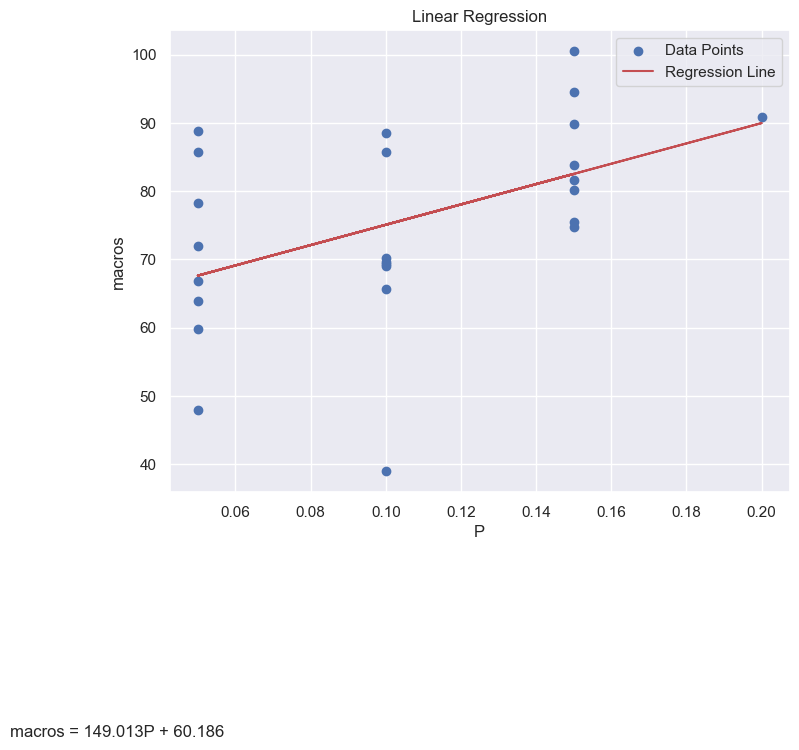

In [70]:
from matplotlib import pyplot as plt
import scipy

temp_results = new_m.copy()

temp_results['macros'] = temp_results['Protein'] + temp_results['Carbohydrate'] + temp_results['Lipid']

y_label = "macros"
x_label = "P"

temp_results = temp_results.dropna()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results[x_label], temp_results[y_label])

# Create the regression line equation
equation = f'{y_label} = {slope:.3f}{x_label} + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results[x_label], temp_results[y_label], label='Data Points')
# Add the regression line to the plot
plt.plot(m[x_label], slope * m[x_label] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import scipy

temp_results = m.copy()
temp_results['chlorophyll'] = temp_results['chla'] + temp_results['chlb']

temp_results['chlorophyll'] = temp_results['chlorophyll']/1000

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results['aeration'], temp_results['chlorophyll'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.5f}aeration + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results['aeration'], temp_results['chlorophyll'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['aeration'], slope * m['aeration'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()